In [ ]:
!pip install pandas_datareader --upgrade # this is necessary for making the datareader work
!pip install pandas --upgrade # this is necessary for making the pd.TimeGrouper work
!pip install cvxpy --upgrade

import pandas_datareader as pdr

import pandas as pd
import numpy as np
from scipy.optimize import minimize
import cvxpy as cvx
import matplotlib.pyplot as plt

In [ ]:
#### Task 1 -------------------------------------------------------

data_raw = [{'id':1, 'Name':'John','Salary':300,"manager_id":3},
           {'id':2, 'Name':'Mike','Salary':200,"manager_id":3},
           {'id':3, 'Name':'Sally','Salary':550,"manager_id":4},
           {'id':4, 'Name':'Jane','Salary':500,"manager_id":7},
           {'id':5, 'Name':'Joe','Salary':600,"manager_id":7},
           {'id':6, 'Name':'Dan','Salary':600,"manager_id":3},
           {'id':7, 'Name':'Phil','Salary':550,"manager_id":None}]
df_employees = pd.DataFrame(data_raw)
print(df_employees)

   id   Name  Salary  manager_id
0   1   John     300         3.0
1   2   Mike     200         3.0
2   3  Sally     550         4.0
3   4   Jane     500         7.0
4   5    Joe     600         7.0
5   6    Dan     600         3.0
6   7   Phil     550         NaN


In [ ]:
### Task 1.a
df_joined_by_manager = pd.merge(df_employees, df_employees, how='left', left_on='manager_id', right_on='id', suffixes=('_employee', '_manager'))
df_earn_more_than_manager = df_joined_by_manager[df_joined_by_manager['Salary_employee'] > df_joined_by_manager['Salary_manager']]

print(df_earn_more_than_manager.Name_employee.to_list())

['Sally', 'Joe', 'Dan']


In [ ]:
### Task 1.b
all_manager_ids = set(df_employees.manager_id.unique())
df_not_manager = df_employees[~df_employees.id.isin(all_manager_ids)]
avg_salary = df_not_manager.Salary.mean()
print(avg_salary)

425.0


In [ ]:
### Task 2 -------------------------------------------------------
def exists(var_name):
  if var_name in locals():
    return True
  elif var_name in globals():
    return True
  else:
    return False

print(f'Expected: {False}. Got: {exists("test_var")}')

test_var = 'hello world'

print(f'Expected: {True}. Got: {exists("test_var")}')

Expected: False. Got: False
Expected: True. Got: True


In [ ]:
### Task 3 -------------------------------------------------------
def compute_pascal_triangle(up_to_layer, print_result=True):
  result = []

  first_layer = [1]
  if print_result:
    print(first_layer)
  
  result.append(first_layer)
  
  for i in range(1, up_to_layer):  #lets say input 5, (1,5) then its 1,2,3,4
    new_layer = [1]
    previous_layer = result[i-1]
    for j in range(1, len(previous_layer)):
      new_layer.append(previous_layer[j - 1] + previous_layer[j])
    new_layer.append(1)

    if print_result:
      print(new_layer)

    result.append(new_layer)
  return result

result = compute_pascal_triangle(6)

[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]


In [ ]:
### Task 4 -------------------------------------------------------
stocks = ['AAPL', 'IBM', 'GOOG', 'BP', 'XOM', 'COST', 'GS']
weights = [0.15, 0.2, 0.2, 0.15, 0.1, 0.15, 0.05]

In [ ]:
### Task 4.a b

start = '2016-01-01'

end = '2016-12-31'

df_daily_2016 = pdr.DataReader(stocks, data_source='yahoo', start=start, end=end)
df_daily_2016 = df_daily_2016['Adj Close']
print(df_daily_2016)

Symbols          AAPL         IBM  ...        COST          GS
Date                               ...                        
2016-01-04  24.251438   99.541290  ...  140.806244  159.765869
2016-01-05  23.643717   99.468063  ...  141.150436  157.014984
2016-01-06  23.181011   98.970184  ...  139.844254  153.181854
2016-01-07  22.202665   97.278824  ...  136.640488  148.473816
2016-01-08  22.320076   96.378227  ...  134.248734  147.860535
...               ...         ...  ...         ...         ...
2016-12-23  27.419540  126.714798  ...  144.690689  220.713516
2016-12-27  27.593676  127.041649  ...  144.663910  221.253937
2016-12-28  27.476017  126.319557  ...  143.735458  220.420380
2016-12-29  27.468954  126.631165  ...  143.842636  218.158020
2016-12-30  27.254816  126.167557  ...  142.932037  219.321243

[252 rows x 7 columns]


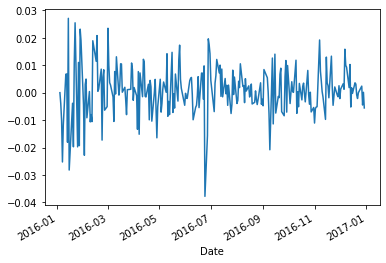

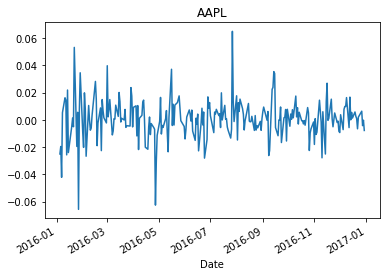

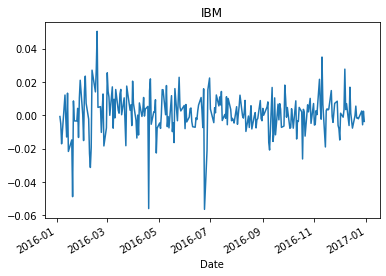

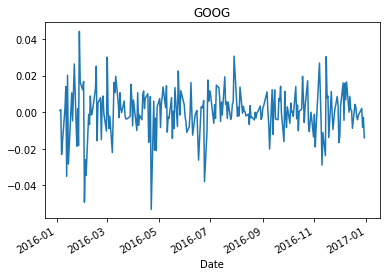

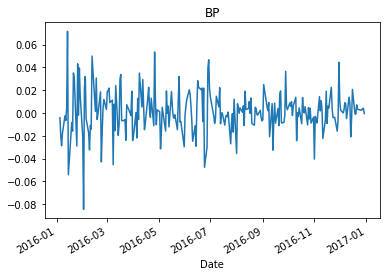

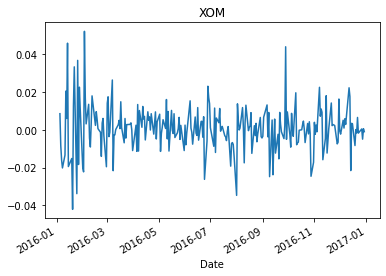

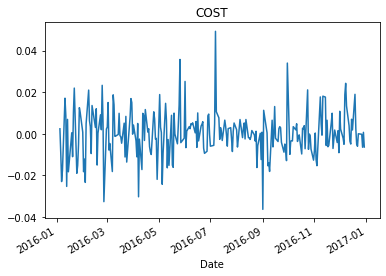

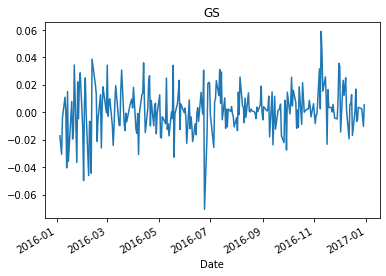

In [ ]:
conf = 5

df_daily_returns_2016 = df_daily_2016.pct_change() # transform the adj close into percentage returns
df_daily_returns_2016_weighted_sum = df_daily_returns_2016.mul(weights, axis='columns').sum(axis=1)

df_daily_returns_2016_weighted_sum.plot()


for s in stocks:
  plt.figure()
  df_daily_returns_2016[s].plot(title=s)

-0.015155991487875834
-0.02176439927590033


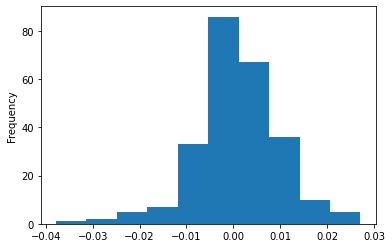

In [ ]:
### Task 4.a

var_95_historic = np.percentile(df_daily_returns_2016_weighted_sum, conf, interpolation='lower')
print(var_95_historic)

cvar_95_historic = df_daily_returns_2016_weighted_sum[df_daily_returns_2016_weighted_sum < var_95_historic].mean()
print(cvar_95_historic)

df_daily_returns_2016_weighted_sum.plot.hist()


In [ ]:
### Task 4.b
z_alpha = -1.645 # the 5%-quantile of N(0,1)
return_mean = df_daily_returns_2016_weighted_sum.mean()
return_std = df_daily_returns_2016_weighted_sum.std()

var_95_parametric = return_mean + z_alpha * return_std
print(var_95_parametric)

cvar_95_parametric = df_daily_returns_2016_weighted_sum[df_daily_returns_2016_weighted_sum < var_95_parametric].mean()
print(cvar_95_parametric)

-0.014170147683796541
-0.02125606021528306


In [ ]:
### Task 4.c


In [ ]:
### Task 5 -------------------------------------------------------

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path

file_path = Path('/content/drive/MyDrive/Colab Notebooks/pydriller-master')

py_suffix = '.py'

In [ ]:
### Task 5.a
py_suffix = '.py'
num_python_files = len(list(file_path.glob(f'**/*{py_suffix}')))
print(num_python_files)

50


In [ ]:
def for_each_file_lines(dir_path, file_suffix, fun):
  is_in_comment = False
  for file_name in list(dir_path.glob(f'**/*{file_suffix}')):
    with open(file_name) as file:
        lines = file.readlines()
        lines = [line.lstrip() for line in lines]
        for li in lines:
            if len(li) == 0:
              pass
            elif li.startswith('"""'):
                is_in_comment = not is_in_comment
                fun(li, True)
            elif li.startswith('#') or is_in_comment:
                fun(li, True)
            else:
                fun(li, False)

In [ ]:
### Task 5.b

num_lines_of_code = 0
num_lines_of_comment = 0


def fun_line_counter(line, comment):
    global num_lines_of_comment
    global num_lines_of_code
    if comment:
        num_lines_of_comment += 1
    else:
        num_lines_of_code += 1


for_each_file_lines(file_path, py_suffix, fun_line_counter)

print(num_lines_of_comment)
print(num_lines_of_code)

1077
3332


In [ ]:
### Task 5.c

num_functions = 0

def fun_count_functions(li, comment):
    global num_functions
    if not comment:
        line_split = li.split('#') # ignore "def" if it starts behind a comment
        num_functions += line_split[0].count('def ')

for_each_file_lines(file_path, py_suffix, fun_count_functions)

print(num_functions)

331


In [ ]:
### Task 5.d


In [ ]:
### Task 5.e
def list_folder_stats(folder, level, max_level):
    size = sum(f.stat().st_size for f in folder.glob('**/*') if f.is_file())
    size = size / 1e6 # convert to MB
    prefix = '    ' * level # print nicely
    print(f'{prefix}{folder}: {size}')
    if level < max_level:
        for f in folder.glob('*'):
            if f.is_dir():
                list_folder_stats(f, level + 1, max_level)


list_folder_stats(file_path, 0, 2)

/content/drive/MyDrive/Colab Notebooks/pydriller-master: 34.87441
    /content/drive/MyDrive/Colab Notebooks/pydriller-master/pydriller: 0.086607
        /content/drive/MyDrive/Colab Notebooks/pydriller-master/pydriller/metrics: 0.020766
        /content/drive/MyDrive/Colab Notebooks/pydriller-master/pydriller/utils: 0.011042
        /content/drive/MyDrive/Colab Notebooks/pydriller-master/pydriller/domain: 0.031616
    /content/drive/MyDrive/Colab Notebooks/pydriller-master/docs: 2.359394
    /content/drive/MyDrive/Colab Notebooks/pydriller-master/tests: 0.109711
        /content/drive/MyDrive/Colab Notebooks/pydriller-master/tests/integration: 0.028871
        /content/drive/MyDrive/Colab Notebooks/pydriller-master/tests/metrics: 0.022367


In [ ]:
### Task 6-------------------------------------
from pathlib import Path
import re
text_path = Path('/content/drive/MyDrive/Colab Notebooks/test_data.txt')
file = open(text_path,'r')
text = file.read()
text

'\n            ES15-0562S\n            01/13/2016\n            11 AM\n            \n            Central Treatment Plant Elevated Safety Platform\n            Specification\n            \n            01/05/2016\n        \n---\nSource: http://cms.cityoftacoma.org/Purchasing/SmallWorksRoster/ES15-0562S.pdf\n\n\n\n---\nCity of Tacoma\nEnvironmental Services Department\n\nSPECIFICATION NO.\nES15-0562S\nCENTRAL TREATMENT PLANT\nELEVATED SAFETY PLATFORM\n\nProject No. ENV-04015-05-02\n\nRevised: 01/02/2014\n\n\x0c\x0cSPECIFICATION NO. ES15-0562S\nTABLE OF CONTENTS\nNOTE: ALL BIDDERS MUST HAVE A COPY OF THE SPECIFICATIONS AND THE BID\nSUBMITTAL PACKAGE\nREQUEST FOR BIDS\nSPECIAL REMINDER TO ALL BIDDERS\nSPECIAL NOTICE TO BIDDERS\nSTANDARD TERMS AND CONDITIONS\nGENERAL PROVISIONS â\x80\x93 SMALL WORKS ROSTER\nPART I\n\nBID PROPOSAL AND CONTRACT FORMS\n1\n2\n3\n4\n5\n6\n\nBid Proposal\nSignature Page\nState Responsibility and Reciprocal Bid Preference Information\nContract\nPerformance Bond\nGen

In [ ]:
matches1 = re.findall(r'(\d+ (Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sept|Oct|Nov|Dec) \d+)',text)
matches2 = re.findall(r'(\d+/\d+/\d+)',text)
total_num_of_dates = len(matches1) + len(matches2)
print(total_num_of_dates) 

210
